# Modified equation to to keep real tax rates 

## Import the model class
This class incorporates most of the methods used to manage a model. 

In [20]:
%matplotlib inline

In [21]:
 %load_ext autoreload
 %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from modelclass import model 
model.widescreen()
model.scroll_off()

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. 

In [23]:
mpak,baseline = model.modelload('../../models/pak_exogenized.pcim',run=1,silent=1,keep='No tax change')
mpakdisplay,_ = model.modelload('../../models/pak_exogenized.pcim',run=1,silent=1,keep='No tax change')

## Define a list of CO2 emission tax rates
There is different taxrates for emission from oil, gas and coal 

In [24]:
taxvar  = mpak.vlist('PAKGGREVCO2???')

In [25]:
[[t,mpak.var_description[t]] for t in taxvar]

[['PAKGGREVCO2CER', 'Tax/subsidy (Coal) (USD p/tco2)'],
 ['PAKGGREVCO2GER', 'Tax/subsidy (Gas) (USD p/tco2)'],
 ['PAKGGREVCO2OER', 'Tax/subsidy (Oil) (USD p/tco2)']]

## Create a experiment  where nominal tax is set to 29

In [26]:
alternative_nominal = baseline.upd('<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29')
_ = mpak(alternative_nominal,2020,2100,keep=f'Coal, Oil and Gastax : 29 nominal')

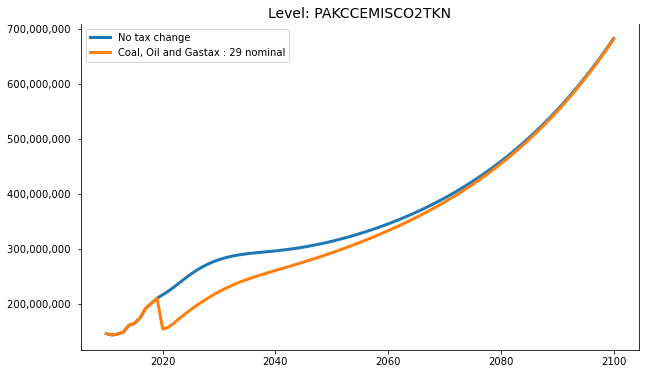

In [27]:
mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,legend=1);

## Now modify  the mpak model so the carbon tax can be kept constant in real terms

In the mpak model the carbon tax variables ```PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER``` where exogenous variables. Now equations for these variables are introduced to and a new modified model is created. 

Each tax variable are now determined by an equation which makes its growth rate follow the growth rate of GDF ```PAKNECONPRVTXN```. 

The new equations are made fixable, so the previous behavior can be preserved. The behavior in each year is determined by the ```<name>_D``` variable. If it is 1 the variable will take the value ```<name>_X``` if the value is 0 the expression will 
determine the value

In [28]:
mpakreal,baseline_real = mpak.equpdate('''\
<fixable> PAKGGREVCO2CER = PAKGGREVCO2CER(-1) * PAKNECONPRVTXN(-1) / PAKNECONPRVTXN(-2)
<fixable> PAKGGREVCO2OER = PAKGGREVCO2OER(-1) * PAKNECONPRVTXN(-1) / PAKNECONPRVTXN(-2)
<fixable> PAKGGREVCO2GER = PAKGGREVCO2GER(-1) * PAKNECONPRVTXN(-1) / PAKNECONPRVTXN(-2)
''',add_add_factor=False, calc_add=False,newname='Pak model, real adjusted tax')


The model:"pak model" got new equations, new model name is:"Pak model, real adjusted tax"
New equation for For PAKGGREVCO2CER
Old frml   :new endogeneous variable 
New frml   :FRML <fixable> PAKGGREVCO2CER = (PAKGGREVCO2CER(-1)*PAKNECONPRVTXN(-1)/PAKNECONPRVTXN(-2))* (1-PAKGGREVCO2CER_D)+ PAKGGREVCO2CER_X*PAKGGREVCO2CER_D$
Adjust calc:No frml for adjustment calc  

New equation for For PAKGGREVCO2OER
Old frml   :new endogeneous variable 
New frml   :FRML <fixable> PAKGGREVCO2OER = (PAKGGREVCO2OER(-1)*PAKNECONPRVTXN(-1)/PAKNECONPRVTXN(-2))* (1-PAKGGREVCO2OER_D)+ PAKGGREVCO2OER_X*PAKGGREVCO2OER_D$
Adjust calc:No frml for adjustment calc  

New equation for For PAKGGREVCO2GER
Old frml   :new endogeneous variable 
New frml   :FRML <fixable> PAKGGREVCO2GER = (PAKGGREVCO2GER(-1)*PAKNECONPRVTXN(-1)/PAKNECONPRVTXN(-2))* (1-PAKGGREVCO2GER_D)+ PAKGGREVCO2GER_X*PAKGGREVCO2GER_D$
Adjust calc:No frml for adjustment calc  



## Nominal tax of 29 in the real model. 

In [29]:
alternative_real_model_nominal_tax = baseline_real.upd('''
<2023 2100> 
PAKGGREVCO2CER_D PAKGGREVCO2GER_D PAKGGREVCO2OER_D = 1
PAKGGREVCO2CER_X PAKGGREVCO2GER_X PAKGGREVCO2OER_X = 29
''')
_ = mpakreal(alternative_real_model_nominal_tax,2021,2100,alfa=0.5,keep='Real model nominal tax = 29')

In [30]:
# mpakreal.fix_inf() # for chekking 

## Real tax in the real model 


In [31]:
alternative_real_model_real_tax = baseline_real.upd('''
<2023 2023> 
PAKGGREVCO2CER_D PAKGGREVCO2GER_D PAKGGREVCO2OER_D = 1
PAKGGREVCO2CER_X PAKGGREVCO2GER_X PAKGGREVCO2OER_X = 29
<2024 2100> 
PAKGGREVCO2CER_D PAKGGREVCO2GER_D PAKGGREVCO2OER_D = 0 

''')
res = mpakreal(alternative_real_model_real_tax,2021,2100,alfa=0.5,keep='Real model Real tax = 29',silent=1)

In [32]:
with mpakreal.set_smpl(2020,2030):
    mpakreal.fix_inf()


Acquisition of non-financial assets

FRML <Z,EXO> PAKGGEXPCAPTCN = (0.3*PAKGGEXPCAPTCN(-1)+(1-0.3)*(0.37*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+393385.011*DURING_2013 + PAKGGEXPCAPTCN_A)* (1-PAKGGEXPCAPTCN_D)+ PAKGGEXPCAPTCN_X*PAKGGEXPCAPTCN_D  $



Expenditure on Goods and Services

FRML <Z,EXO> PAKGGEXPGNFSCN = (0.3*PAKGGEXPGNFSCN(-1)+(1-0.3)*(0.80*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+505277.259999999*DURING_2012 + PAKGGEXPGNFSCN_A)* (1-PAKGGEXPGNFSCN_D)+ PAKGGEXPGNFSCN_X*PAKGGEXPGNFSCN_D  $



Other Expenditure

FRML <Z,EXO> PAKGGEXPOTHRCN = (-PAKGGEXPOTHRCN_A*PAKNYGDPMKTPXN*PAKNYGDPPOTLKN+PAKNYGDPMKTPXN*PAKNYGDPPOTLKN* (-0.00363915924526289) ) * (1-PAKGGEXPOTHRCN_D)+ PAKGGEXPOTHRCN_X*PAKGGEXPOTHRCN_D  $



Transfers

FRML <Z,EXO> PAKGGEXPTRNSCN = (0.91020884318931*PAKGGEXPTRNSCN(-1)+(1-0.91020884318931)*(0.06*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))) + PAKGGEXPTRNSCN_A)* (1-PAKGGEXPTRNSCN_D)+ PAKGGEXPTRNSCN_X*PAKGGEXPTRNSCN_D  $


In [33]:
mpakreal['PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER PAKNECONPRVTXN PAKCCEMISCO2TKN']

# Now look at the results for the two models. 

In [34]:
mpakdisplay.keep_solutions = {**mpak.keep_solutions,**mpakreal.keep_solutions}
mpakdisplay.keep_solutions.keys()

dict_keys(['No tax change', 'Coal, Oil and Gastax : 29 nominal', 'Real model nominal tax = 29', 'Real model Real tax = 29'])

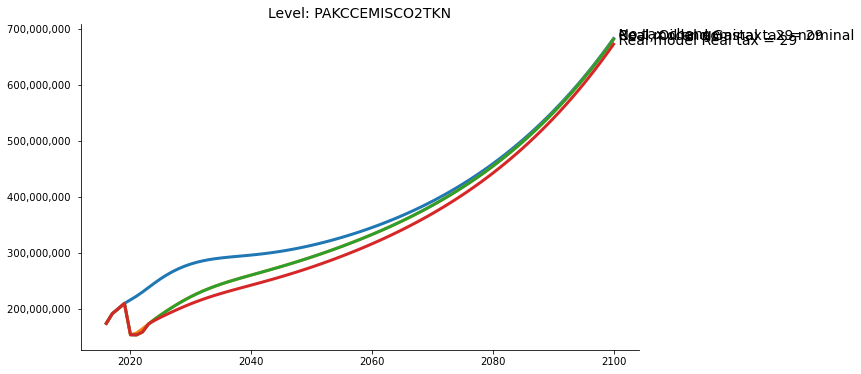

In [35]:
mpakdisplay.keep_plot('PAKCCEMISCO2TKN',2016,2100,diff=0,legend=0);

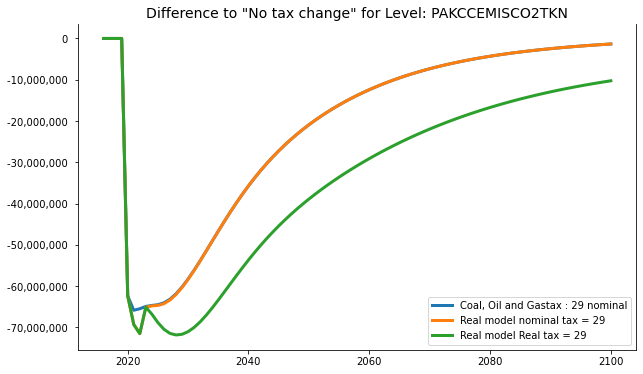

In [36]:
with mpakdisplay.keepswitch(scenarios='*'):
    mpakdisplay.keep_plot('PAKCCEMISCO2TKN',2016,2100,diff=1,legend=1);